<a href="https://colab.research.google.com/github/epadam/clearml_test/blob/main/taxi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
!mkdir ~/.kaggle/
!mv kaggle.json ~/.kaggle/kaggle.json
!chmod 600 ~/.kaggle/kaggle.json

In [4]:
!wget https://archive.ics.uci.edu/ml/machine-learning-databases/00275/Bike-Sharing-Dataset.zip

--2022-06-30 03:44:21--  https://archive.ics.uci.edu/ml/machine-learning-databases/00275/Bike-Sharing-Dataset.zip
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 279992 (273K) [application/x-httpd-php]
Saving to: ‘Bike-Sharing-Dataset.zip’

Bike-Sharing-Datase 100%[===================>] 273.43K   992KB/s    in 0.3s    

2022-06-30 03:44:22 (992 KB/s) - ‘Bike-Sharing-Dataset.zip’ saved [279992/279992]



In [5]:
!unzip /content/Bike-Sharing-Dataset.zip

Archive:  /content/Bike-Sharing-Dataset.zip
  inflating: Readme.txt              
  inflating: day.csv                 
  inflating: hour.csv                


In [6]:
import pandas as pd
import numpy as np
day = pd.read_csv('/content/day.csv')
hour = pd.read_csv('/content/hour.csv')

In [7]:
import matplotlib.pyplot as plt 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb
from sklearn.metrics import mean_squared_error


In [6]:
hour.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [8]:
day.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [8]:
day.describe()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


In [9]:
day = day.drop(columns= ["dteday", "instant"] , axis = 1)

In [10]:
day.dropna()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
726,1,1,12,0,4,1,2,0.254167,0.226642,0.652917,0.350133,247,1867,2114
727,1,1,12,0,5,1,2,0.253333,0.255046,0.590000,0.155471,644,2451,3095
728,1,1,12,0,6,0,2,0.253333,0.242400,0.752917,0.124383,159,1182,1341
729,1,1,12,0,0,0,1,0.255833,0.231700,0.483333,0.350754,364,1432,1796


In [11]:
day.isnull().sum()

season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [19]:
df_target = day.groupby("cnt").size()
df_target

cnt
22      1
431     1
441     1
506     1
605     1
       ..
8294    1
8362    1
8395    1
8555    1
8714    1
Length: 696, dtype: int64

In [12]:
X = day.drop(columns= "cnt" , axis = 1)

In [13]:
Y = day["cnt"]

In [14]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.1, random_state=2)

In [15]:
print(X.shape, X_train.shape, X_test.shape)

(731, 13) (657, 13) (74, 13)


In [14]:
lr = LinearRegression()

In [15]:
lr.fit(X_train, Y_train)

LinearRegression()

In [16]:
result = lr.predict(X_test)
result

array([5847., 4541., 3117., 3820., 1712., 1996., 8294., 5302., 3310.,
       3761., 4521.,  986., 1495., 8555.,  623., 3873., 3846., 4911.,
       7216., 6230., 8090., 4507., 4634., 1204., 1501., 7865., 3392.,
       7335., 3204., 6597., 5319., 1543., 4649., 4381., 5668., 3544.,
       2192., 3727., 6043., 4803., 5382., 7384., 1650., 7499., 7870.,
       4068., 7444., 5260., 3487., 2395., 4456., 3811., 3747., 1944.,
       3429., 6864.,  801., 7129., 5875., 7907., 6421., 2432., 3005.,
       7639., 4725., 3214., 6824., 5409., 2703., 4672.,  705., 5499.,
       4401., 7350.])

In [20]:
Y_test

671    5847
199    4541
77     3117
225    3820
37     1712
       ... 
554    4672
340     705
688    5499
158    4401
608    7350
Name: cnt, Length: 74, dtype: int64

In [15]:
lr.score(X_test, Y_test)

1.0

In [17]:

data_dmatrix = xgb.DMatrix(data=X_train, label=Y_train)
params = {"objective":'reg:squarederror', "colsample_bytree":0.4, "learning_rate":0.1, "max_depth":2, "alpha":10, "n_boost_round":30}
xg_m = xgb.train(params=params, dtrain=data_dmatrix)

data_dmatrix_test = xgb.DMatrix(data=X_test)
preds = xg_m.predict(data_dmatrix_test)

print(np.sqrt(mean_squared_error(preds, Y_test)))

2017.4133684415744


In [20]:
preds = reg.predict(X_test)
preds

array([5752.28, 4546.95, 3091.58, 3944.86, 1719.82, 2038.4 , 7662.49,
       5259.35, 3348.17, 3782.25, 4358.05, 1040.44, 1208.55, 8270.78,
        765.17, 3872.7 , 3965.32, 4944.68, 7287.9 , 6196.57, 7686.01,
       4544.48, 4655.45, 1150.66, 1539.31, 7633.28, 3350.34, 7369.22,
       3066.34, 6578.72, 5316.41, 1562.37, 4671.98, 4202.62, 5699.14,
       3572.24, 2185.81, 3719.93, 6082.81, 4789.07, 5547.34, 7415.17,
       1661.99, 7743.76, 7680.76, 4092.05, 7466.41, 5194.12, 3535.07,
       2418.03, 4487.65, 3829.53, 3661.52, 1968.53, 3420.08, 6872.44,
        894.02, 7055.89, 5802.88, 7748.85, 6461.06, 2546.74, 3221.88,
       7779.67, 4742.25, 3282.3 , 6738.26, 5352.74, 2745.83, 4585.29,
        713.68, 5488.69, 4414.16, 7544.99])

In [25]:
RF = RandomForestRegressor()
RF.fit(X_train, Y_train)

RandomForestRegressor()

In [27]:
result = RF.predict(X_test)
result

array([5748.59, 4517.62, 3090.68, 3935.63, 1741.4 , 2047.66, 7598.83,
       5228.34, 3364.12, 3804.53, 4378.72, 1005.8 , 1233.96, 8168.13,
        800.58, 3849.13, 3985.83, 4939.36, 7315.13, 6212.34, 7754.27,
       4536.49, 4636.45, 1142.51, 1531.63, 7675.58, 3365.13, 7402.79,
       3065.78, 6606.35, 5316.92, 1534.94, 4726.79, 4326.42, 5700.83,
       3577.37, 2149.66, 3712.64, 6126.21, 4772.94, 5556.78, 7385.89,
       1654.96, 7748.32, 7695.96, 4066.73, 7448.38, 5224.45, 3533.51,
       2413.66, 4535.25, 3815.41, 3666.29, 1960.62, 3416.39, 6863.91,
        908.91, 6981.44, 5827.91, 7788.68, 6487.32, 2545.02, 3238.43,
       7740.21, 4749.09, 3267.4 , 6731.88, 5374.8 , 2722.2 , 4585.73,
        768.13, 5496.18, 4385.75, 7588.49])

In [16]:
from sklearn.preprocessing import MinMaxScaler
mms = MinMaxScaler()
mms.fit(X_train)
X_train = mms.transform(X_train)
X_test = mms.transform(X_test)

In [17]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
model = Sequential(name='BostonHousingPrices')
model.add(Dense(100, input_dim = 13, activation='relu', name='Hidden-1'))
model.add(Dense(100, activation='relu', name='Hidden-2'))
model.add(Dense(1, activation='linear', name='Output'))

In [18]:
model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])

In [19]:
hist = model.fit(X_train, Y_train, batch_size=32, epochs=500, validation_split=0.2)

Epoch 1/500
17/17 [==============================] - 1s 24ms/step - loss: 24286978.0000 - mae: 4560.4829 - val_loss: 22182240.0000 - val_mae: 4234.6274
Epoch 2/500
17/17 [==============================] - 0s 5ms/step - loss: 24213964.0000 - mae: 4552.9810 - val_loss: 22082804.0000 - val_mae: 4223.7920
Epoch 3/500
17/17 [==============================] - 0s 6ms/step - loss: 24079150.0000 - mae: 4539.0864 - val_loss: 21919444.0000 - val_mae: 4205.8921
Epoch 4/500
17/17 [==============================] - 0s 7ms/step - loss: 23872636.0000 - mae: 4517.7080 - val_loss: 21679402.0000 - val_mae: 4179.4639
Epoch 5/500
17/17 [==============================] - 0s 6ms/step - loss: 23578884.0000 - mae: 4487.4800 - val_loss: 21354956.0000 - val_mae: 4143.4492
Epoch 6/500
17/17 [==============================] - 0s 6ms/step - loss: 23194734.0000 - mae: 4447.1943 - val_loss: 20938242.0000 - val_mae: 4096.6821
Epoch 7/500
17/17 [==============================] - 0s 7ms/step - loss: 22711688.0000 - mae:

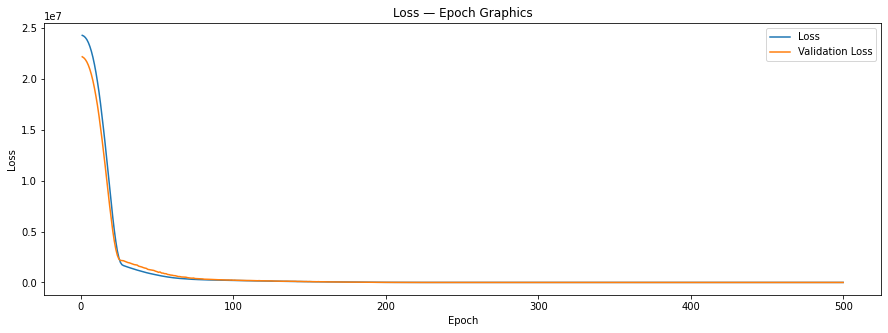

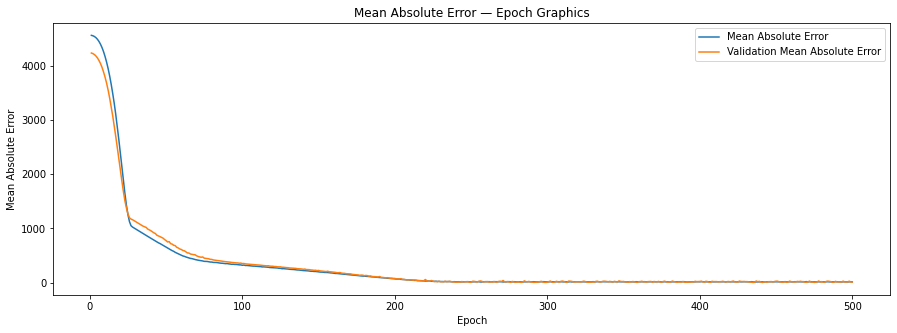

In [20]:
import matplotlib.pyplot as plt
figure = plt.gcf()
figure.set_size_inches((15, 5))
plt.title('Loss — Epoch Graphics')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.plot(range(1, len(hist.history['loss']) + 1), hist.history['loss'])
plt.plot(range(1, len(hist.history['val_loss']) + 1), hist.history['val_loss'])
plt.legend(['Loss', 'Validation Loss'])
plt.show()
figure = plt.gcf()
figure.set_size_inches((15, 5))
plt.title('Mean Absolute Error — Epoch Graphics')
plt.xlabel('Epoch')
plt.ylabel('Mean Absolute Error')
plt.plot(range(1, len(hist.history['mae']) + 1), hist.history['mae'])
plt.plot(range(1, len(hist.history['val_mae']) + 1), hist.history['val_mae'])
plt.legend(['Mean Absolute Error', 'Validation Mean Absolute Error'])
plt.show()

In [38]:
results = model.predict(X_test)

In [39]:
Yt = Y_test.to_numpy()

In [40]:
len(Yt)

74

In [41]:
Yt = np.split(Yt, 74)

In [34]:
results =np.concatenate(results)
results

array([5860.1084 , 4553.7876 , 3126.0383 , 3831.4644 , 1717.1948 ,
       2005.0894 , 8310.164  , 5314.903  , 3317.9111 , 3770.8416 ,
       4532.215  ,  988.58093, 1501.4221 , 8572.403  ,  692.61707,
       3885.1587 , 3858.9453 , 4921.2324 , 7232.163  , 6243.283  ,
       8106.448  , 4519.5425 , 4645.4    , 1208.2578 , 1504.5933 ,
       7882.27   , 3400.339  , 7350.6836 , 3212.5864 , 6612.5977 ,
       5330.577  , 1550.8798 , 4661.1084 , 4391.4824 , 5680.6846 ,
       3555.3557 , 2198.5962 , 3736.1035 , 6056.317  , 4813.2544 ,
       5394.773  , 7399.052  , 1655.3237 , 7515.1997 , 7885.9614 ,
       4077.9324 , 7459.9775 , 5273.243  , 3497.016  , 2405.245  ,
       4466.989  , 3820.512  , 3756.0671 , 1949.4832 , 3437.7249 ,
       6880.3765 ,  801.9505 , 7143.6562 , 5889.087  , 7922.5625 ,
       6435.0386 , 2438.9368 , 3013.587  , 7654.1113 , 4737.153  ,
       3222.3064 , 6841.6875 , 5420.606  , 2710.8328 , 4686.9917 ,
        696.66144, 5511.201  , 4413.284  , 7366.8774 ], dtype=

In [43]:
compare = np.concatenate((results, Yt), axis=1)

In [44]:
compare

array([[5860.10839844, 5847.        ],
       [4553.78759766, 4541.        ],
       [3126.03833008, 3117.        ],
       [3831.46435547, 3820.        ],
       [1717.19482422, 1712.        ],
       [2005.08935547, 1996.        ],
       [8310.1640625 , 8294.        ],
       [5314.90283203, 5302.        ],
       [3317.91113281, 3310.        ],
       [3770.84155273, 3761.        ],
       [4532.21484375, 4521.        ],
       [ 988.58093262,  986.        ],
       [1501.42211914, 1495.        ],
       [8572.40332031, 8555.        ],
       [ 692.61706543,  623.        ],
       [3885.15869141, 3873.        ],
       [3858.9453125 , 3846.        ],
       [4921.23242188, 4911.        ],
       [7232.16308594, 7216.        ],
       [6243.28320312, 6230.        ],
       [8106.44824219, 8090.        ],
       [4519.54248047, 4507.        ],
       [4645.39990234, 4634.        ],
       [1208.2578125 , 1204.        ],
       [1504.59326172, 1501.        ],
       [7882.27001953, 78

In [31]:
print(np.sqrt(mean_squared_error(results, Y_test)))

15.270518910302693
